Convergence index for the centher of mass method p =  1.5042514941387628


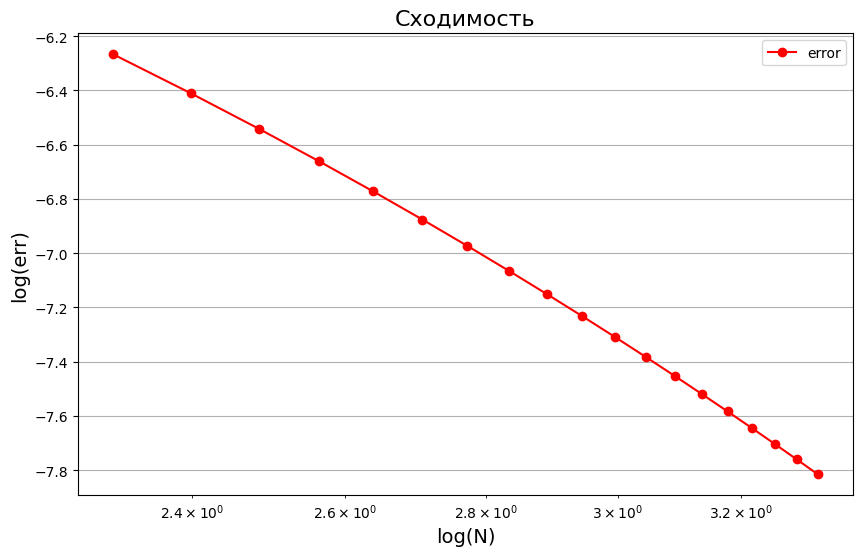

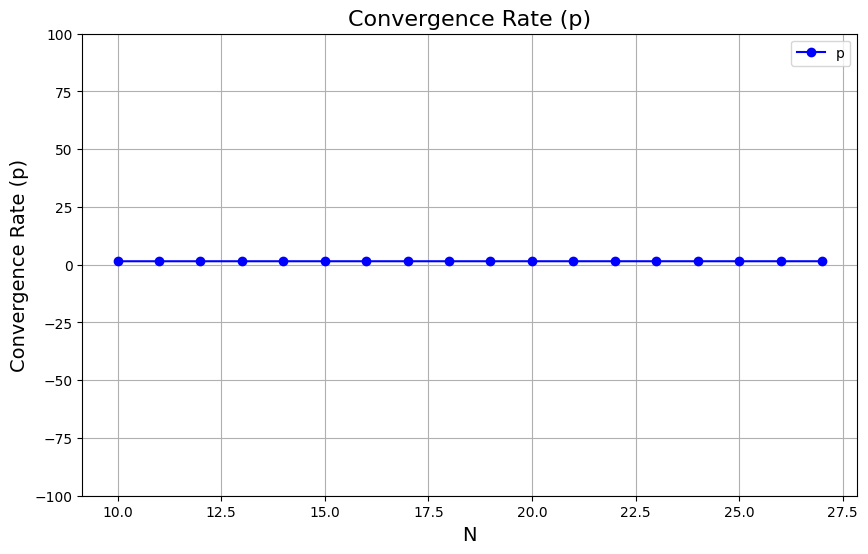

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = "p.txt" 

data = pd.read_csv(filename, sep=r'\s+', header=0, names=['N', 'Approximate', 'True', 'Error'])
N          = data['N']
Quadrature = data['Approximate'] 
Analytical = data['True']
error      = data['Error']

def calculate_p(errors, N):
    p = []
    for i in range(1, len(errors)):
        
        error_i = errors[i] if errors[i] > 1e-18 else 1e-18
        error_prev = errors[i - 1] if errors[i - 1] > 1e-18 else 1e-18

        numerator = np.log(error_prev) - np.log(error_i)
        denominator = np.log(N[i]) - np.log(N[i - 1])

        p_i = numerator / denominator
        
        p.append(p_i)
    return p


p = calculate_p(data['Error'], data['N'])

print("Convergence index for the centher of mass method p = ", np.mean(p))

# print("Элементы массива p:")
# for i, value in enumerate(p):
#     print(f"p[{i}] = {value}")


plt.figure(figsize=(10, 6))
plt.plot(np.log(N), np.log(error), label='error', marker='o', linestyle='-', color='r')


plt.xlabel('log(N)', fontsize=14)
plt.ylabel('log(err)', fontsize=14)
plt.xscale('log') 
plt.title('Сходимость', fontsize=16)
plt.legend()

plt.grid(True)

plt.show()

plt.figure(figsize=(10, 6))
plt.plot(N[:-1], p, label='p', marker='o', linestyle='-', color='b')

plt.xlabel('N', fontsize=14)
plt.ylabel('Convergence Rate (p)', fontsize=14)  # Убрали log(p)
plt.title('Convergence Rate (p)', fontsize=16)
plt.legend()

# Устанавливаем диапазон оси y
plt.ylim(-100, 100.0)

# Отключаем экспоненциальный формат для оси y
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)  
plt.show()

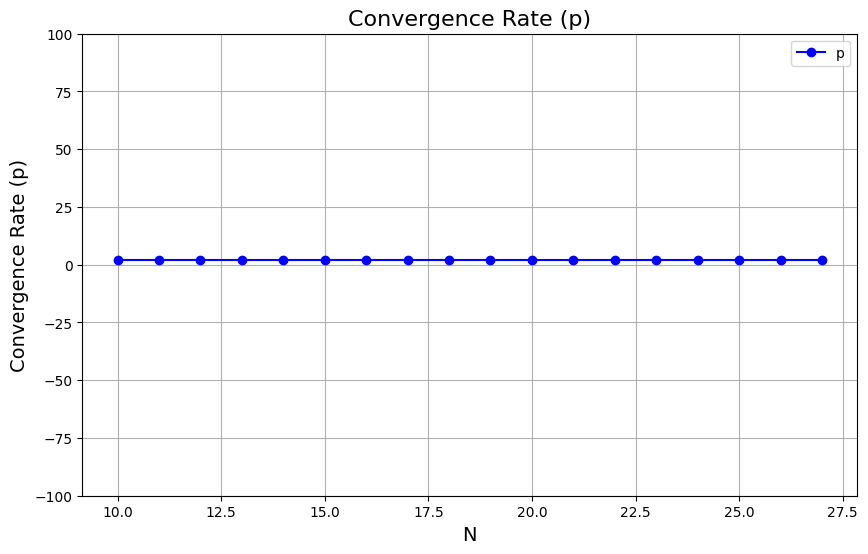

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(N[:-1], p, label='p', marker='o', linestyle='-', color='b')

plt.xlabel('N', fontsize=14)
plt.ylabel('Convergence Rate (p)', fontsize=14)  # Убрали log(p)
plt.title('Convergence Rate (p)', fontsize=16)
plt.legend()

# Устанавливаем диапазон оси y
plt.ylim(-100, 100.0)

# Отключаем экспоненциальный формат для оси y
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)  
plt.show()